# Clustering (Agrupamiento): Ejemplo 2


Los datos de este ejemplo están adaptados del repositorio UCI: https://archive.ics.uci.edu/ml/datasets/seeds.

Los datos contienen datos de granos de trigo correspondientes a tres variedades diferentes. Cada variedad tiene 70 elementos seleccionados aleatoriamente. Se utilizó rayos X para realizar la visualización de la estructura interna del grano. 

In [1]:
# Solo necesario si se usa Google Colab
!pip install pyspark

     |████████████████████████████████| 212.4MB 69kB/s 
     |████████████████████████████████| 204kB 18.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=525ec3f4e149249413d3b88f1e94be6bbcfaebfca36713795c89f21d0ba38a26
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans

spark = SparkSession.builder.appName('Ejemplo2_clustering').getOrCreate()

In [3]:
# Cargar los datos
df = spark.read.csv("/content/datos_semillas.csv", header=True, inferSchema=True)

#df.printSchema()
df.show(5)

+-----+---------+----------+------------------+------------------+---------------------+---------------+
| area|perimetro|compacidad|    longitud_grano|      ancho_kernel|coeficiente_asimetria|longitud_ranura|
+-----+---------+----------+------------------+------------------+---------------------+---------------+
|15.26|    14.84|     0.871|             5.763|             3.312|                2.221|           5.22|
|14.88|    14.57|    0.8811| 5.553999999999999|             3.333|                1.018|          4.956|
|14.29|    14.09|     0.905|             5.291|3.3369999999999997|                2.699|          4.825|
|13.84|    13.94|    0.8955|             5.324|3.3789999999999996|                2.259|          4.805|
|16.14|    14.99|    0.9034|5.6579999999999995|             3.562|                1.355|          5.175|
+-----+---------+----------+------------------+------------------+---------------------+---------------+
only showing top 5 rows



In [4]:
# Resumen de los datos
df.describe().show()

+-------+------------------+------------------+--------------------+-------------------+------------------+---------------------+-------------------+
|summary|              area|         perimetro|          compacidad|     longitud_grano|      ancho_kernel|coeficiente_asimetria|    longitud_ranura|
+-------+------------------+------------------+--------------------+-------------------+------------------+---------------------+-------------------+
|  count|               210|               210|                 210|                210|               210|                  210|                210|
|   mean|14.847523809523816|14.559285714285718|  0.8709985714285714|  5.628533333333335| 3.258604761904762|   3.7001999999999997|  5.408071428571429|
| stddev|2.9096994306873647|1.3059587265640225|0.023629416583846364|0.44306347772644983|0.3777144449065867|   1.5035589702547392|0.49148049910240543|
|    min|             10.59|             12.41|              0.8081|              4.899|            

### Pre-procesamiento de datos

In [5]:
# Creación de datos con formato para SparkMLlib
from pyspark.ml.feature import VectorAssembler

In [7]:
# Preparar los datos en una columna llamada "atributos"
vec_assembler = VectorAssembler(inputCols=df.columns, 
                                outputCol='atributos')

# Transformar los datos 
df2 = vec_assembler.transform(df)
df2.select('atributos').show(5)

+--------------------+
|           atributos|
+--------------------+
|[15.26,14.84,0.87...|
|[14.88,14.57,0.88...|
|[14.29,14.09,0.90...|
|[13.84,13.94,0.89...|
|[16.14,14.99,0.90...|
+--------------------+
only showing top 5 rows



In [8]:
# Quedarse solo con la columna de atributos
df2 = vec_assembler.transform(df).select('atributos')
df2.show(5, truncate=False)

+---------------------------------------------------------+
|atributos                                                |
+---------------------------------------------------------+
|[15.26,14.84,0.871,5.763,3.312,2.221,5.22]               |
|[14.88,14.57,0.8811,5.553999999999999,3.333,1.018,4.956] |
|[14.29,14.09,0.905,5.291,3.3369999999999997,2.699,4.825] |
|[13.84,13.94,0.8955,5.324,3.3789999999999996,2.259,4.805]|
|[16.14,14.99,0.9034,5.6579999999999995,3.562,1.355,5.175]|
+---------------------------------------------------------+
only showing top 5 rows



In [9]:
# Escalamiento de datos
from pyspark.ml.feature import StandardScaler

# El valor de salida es z = (x-media)/(deviacion_estandar)
scaler = StandardScaler(inputCol="atributos", outputCol="atributos_escalados",  
                        withStd=True, withMean=False)

# Transformar los datos (estandarizar o normalizar)
df = scaler.fit(df2).transform(df2)
df.show(5, truncate=False)

+---------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|atributos                                                |atributos_escalados                                                                                                               |
+---------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|[15.26,14.84,0.871,5.763,3.312,2.221,5.22]               |[5.244527953320284,11.363299389287777,36.860833906302894,13.007165541092315,8.76852883087142,1.4771618831975104,10.62097073949694]|
|[14.88,14.57,0.8811,5.553999999999999,3.333,1.018,4.956] |[5.113930271651758,11.156554723849252,37.28826722714521,12.53544983779745,8.824126386864265,0.6770602418257837,10.08381819634997] |
|[14.29,14.09,0.905,5.291,3.3369999999999997,

In [10]:
# El valor de salida es z = (x-media)/(deviacion_estandar)
scaler = StandardScaler(inputCol="atributos", outputCol="atributos_escalados",  
                        withStd=True, withMean=True)

# Transformar los datos (estandarizar o normalizar)
tmp = scaler.fit(df2).transform(df2)
tmp.show(5, truncate=False)

+---------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------+
|atributos                                                |atributos_escalados                                                                                                                            |
+---------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------+
|[15.26,14.84,0.871,5.763,3.312,2.221,5.22]               |[0.1417590374201429,0.21494881882893777,6.0457329695830086E-5,0.30349300591570155,0.1413640352262526,-0.983799125450589,-0.38266305360010433]  |
|[14.88,14.57,0.8811,5.553999999999999,3.333,1.018,4.956] |[0.011161355751617185,0.008204153390413858,0.42749377817201406,-0.16822269737916232,0.19696159121909768,-1.783900766822316,-0

### Entrenamiento

In [11]:
# Creación del modelo: usando 3 clústeres 
kmeans = KMeans(featuresCol='atributos_escalados', k=3)

# Entrenar el modelo
modelo = kmeans.fit(df)

In [12]:
# Evaluar a través del SSE dentro de la clase
sse = modelo.summary.trainingCost
print("Suma de errores cuadráticos dentro de la clase: {:.3f}".format(sse))

Suma de errores cuadráticos dentro de la clase: 429.029


In [13]:
# Centros de los clústeres
centros = modelo.clusterCenters()

print("Centros de los clústeres: ")
for centro in centros:
    print(centro)

Centros de los clústeres: 
[ 4.88329439 10.89351922 37.27768719 12.35125928  8.56438491  1.80870857
 10.32847336]
[ 6.31670546 12.37109759 37.39491396 13.91155062  9.748067    2.39849968
 12.2661748 ]
[ 4.06133795 10.13721767 35.82681204 11.81771972  7.5087187   3.25852121
 10.4215732 ]


Luego se intentará ver el error con diferentes valores de K. En este caso no es necesario ya que a priori se sabe que hay solamente 3 grupos, pero se incluye aquí solo para ilustrar cómo se podría realizar.

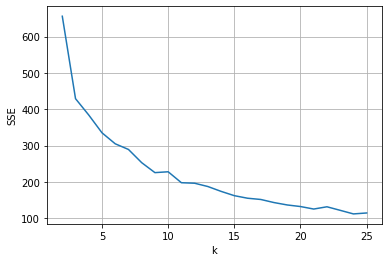

In [14]:
# Escoger el número de clústeres
import numpy as np
import matplotlib.pyplot as plt

Ks = np.arange(2, 26)
SSEs = np.zeros(Ks.shape)

for i, k in enumerate(Ks):
    kmeans2 = KMeans(featuresCol='atributos_escalados', k=k)
    modelo2 = kmeans2.fit(df)
    sse = modelo2.summary.trainingCost
    SSEs[i] = sse

plt.plot(Ks, SSEs)
plt.xlabel('k'); plt.ylabel('SSE')
plt.grid()
plt.show()

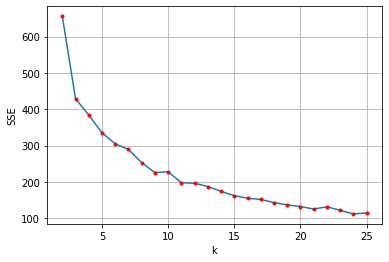

In [17]:
plt.plot(Ks, SSEs)
plt.plot(Ks, SSEs, 'r.')
plt.xlabel('k'); plt.ylabel('SSE')
plt.grid()
plt.show()

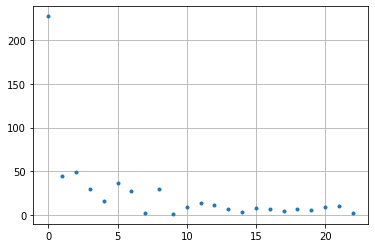

In [24]:
n1 = len(SSEs)-1
dif = np.zeros(n1)
for i in range(n1):
  dif[i] = np.abs(SSEs[i+1] - SSEs[i])
plt.plot(dif,'.')
plt.grid()

### Predicción

In [25]:
# Predicción de las clases
prediccion = modelo.transform(df)

# Esquema (se agrega "prediction" al final del data frame)
prediccion.printSchema()

root
 |-- atributos: vector (nullable = true)
 |-- atributos_escalados: vector (nullable = true)
 |-- prediction: integer (nullable = false)



In [26]:
# Seleccionar solamente los atributos y las predicciones
prediccion.select(['atributos_escalados', 'prediction']).show(5, truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------+----------+
|atributos_escalados                                                                                                               |prediction|
+----------------------------------------------------------------------------------------------------------------------------------+----------+
|[5.244527953320284,11.363299389287777,36.860833906302894,13.007165541092315,8.76852883087142,1.4771618831975104,10.62097073949694]|0         |
|[5.113930271651758,11.156554723849252,37.28826722714521,12.53544983779745,8.824126386864265,0.6770602418257837,10.08381819634997] |0         |
|[4.911160186955888,10.789008651958541,38.29971835270278,11.94185543604363,8.834716397529569,1.7950742560783792,9.817276593500525] |0         |
|[4.756505037611581,10.674150504492696,37.89767711032634,12.01633686287966,8.945911509515255,1.5024352517528932,9.776583219019694] |0   